## Instalação dos pacotes

In [9]:
!pip install pymysql
!pip install -U scikit-learn
!pip install pandas

## Importação das Bibliotecas que serão utilizadas

In [12]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

import numpy as np
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

import pydotplus

## Importando dataset

In [16]:
df = pd.read_csv("covid_data_2020-2021.csv")
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,Negative,No,female,Other
5861476,2020-03-20,0,0,0,0,0,Negative,No,male,Other
5861477,2020-03-20,0,0,0,0,0,Negative,No,female,Other
5861478,2020-03-20,0,0,0,0,0,Negative,No,male,Other


## Verificando os dados

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 447.2+ MB


In [275]:
df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

## Ajustando a tabela

In [276]:
data = df

data['corona_result'] = data['corona_result'].map({'Negative': 0, 'Positive': 1})
data['gender'] = data['gender'].map({'female': 0, 'male': 1})
data['age_60_and_above'] = data['age_60_and_above'].map({'No': 0, 'Yes': 1})

data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,0,1,0,Other
1,2021-10-11,0,0,0,0,0,0,1,1,Other
2,2021-10-11,0,0,0,0,0,0,0,0,Other
3,2021-10-11,0,0,0,0,0,0,1,0,Other
4,2021-10-11,0,0,0,0,0,0,1,0,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,0,0,0,Other
5861476,2020-03-20,0,0,0,0,0,0,0,1,Other
5861477,2020-03-20,0,0,0,0,0,0,0,0,Other
5861478,2020-03-20,0,0,0,0,0,0,0,1,Other


In [277]:
# ALTERANDO TEST_INDICATION, CRIANDO DUMMIES COM pd.get_dummies()

data['test_indication'] = data['test_indication'].map({'Abroad': 'abroad', 'Contact with confirmed': 'contact_with_covid_positive_patient', 'Other': 'other'})
data = pd.get_dummies(data, columns = ['test_indication'])

In [278]:
# RENOMEANDO AS NOVAS COLUNAS E REMOVENDO COLUNAS QUE NAO SERAO UTEIS

data.rename({'test_indication_abroad': 'abroad',
             'test_indication_contact_with_covid_positive_patient': 'contact_with_covid_positive_patient'},
             axis='columns', inplace = True)

data.drop(['test_date','test_indication_other'], axis = 1, inplace = True)
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,abroad,contact_with_covid_positive_patient
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [279]:
# Ajustando a ordem das colunas

data = data[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'abroad', 'contact_with_covid_positive_patient', 'corona_result']]
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,abroad,contact_with_covid_positive_patient,corona_result
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5861475,1,1,0,0,0,0,0,0,0,0
5861476,0,0,0,0,0,0,1,0,0,0
5861477,0,0,0,0,0,0,0,0,0,0
5861478,0,0,0,0,0,0,1,0,0,0


## Selecionando as Features

In [280]:
feature_cols = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'abroad', 'contact_with_covid_positive_patient']
X = data[feature_cols] # Features
y = data.corona_result # Target variable

## Separando os dados

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test|

## Construindo o Decision Tree Model

In [282]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Avaliando o modelo

In [283]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9150316984788824


## Otimizando a performance

In [235]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3) 

clf = clf.fit(X_train.values,y_train.values)

y_pred = clf.predict(X_test.values)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9146870756191269


## Visualizando a árvore de decisão

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.513469 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.513469 to fit



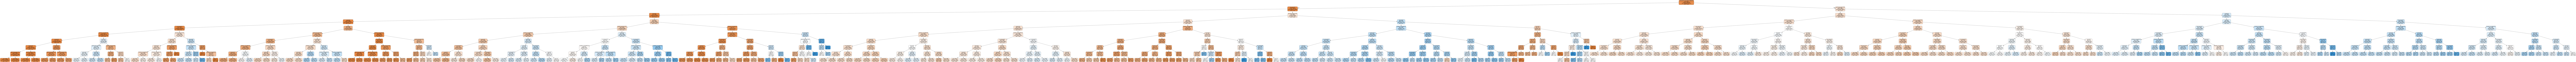

In [285]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'abroad', 'contact_with_covid_positive_patient'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

## Captura dos dados do usuário

In [266]:
opcoes = np.ones(9)
while 1:
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente apresenta tosse? "))
    if(op >= 0 and op < 2):
        opcoes[0] = op
        break;

while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente apresenta febre? "))
    if(op >= 0 and op < 2):
        opcoes[1] = op
        break;

while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente apresenta dor de garganta? "))
    if(op >= 0 and op < 2):
        opcoes[2] = op
        break;
    
while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente apresenta dificuldade para respirar? "))
    if(op >= 0 and op < 2):
        opcoes[3] = op
        break;
        
while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente apresenta dor de cabeça? "))
    if(op >= 0 and op < 2):
        opcoes[4] = op
        break;
        
while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Idade do paciente é maior ou igual à 60? "))
    if(op >= 0 and op < 2):
        opcoes[5] = op
        break;
        
while 1:
    print("\n\n\n------------------------------------")
    print("0 - Feminino")
    print("1 - Masculino")
    op = int(input("Qual o sexo do paciente? "))
    if(op >= 0 and op < 2):
        opcoes[6] = op
        break;

while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente viajou para fora do país? "))
    if(op >= 0 and op < 2):
        opcoes[7] = op
        break;
        
while 1:
    print("\n\n\n------------------------------------")
    print("0 - Não")
    print("1 - Sim")
    op = int(input("Paciente teve contato com alguém positivado com COVID? "))
    if(op >= 0 and op < 2):
        opcoes[8] = op
        break;

0 - Não
1 - Sim
Paciente apresenta tosse? 1



------------------------------------
0 - Não
1 - Sim
Paciente apresenta febre? 1



------------------------------------
0 - Não
1 - Sim
Paciente apresenta dor de garganta? 0



------------------------------------
0 - Não
1 - Sim
Paciente apresenta dificuldade para respirar? 0



------------------------------------
0 - Não
1 - Sim
Paciente apresenta dor de cabeça? 0



------------------------------------
0 - Não
1 - Sim
Idade do paciente é maior ou igual à 60? 0



------------------------------------
0 - Feminino
1 - Masculino
Qual o sexo do paciente? 0



------------------------------------
0 - Não
1 - Sim
Paciente viajou para fora do país? 0



------------------------------------
0 - Não
1 - Sim
Paciente teve contato com alguém positivado com COVID? 0


## Resposta do modelo

In [268]:
resposta = clf.predict(opcoes.reshape(1, 9))

print('Positivo') if resposta == 1 else print('Negativo')


Negativo
